# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# NYC Restaurant Inspections Data

# Import Data

In [25]:
# import NYC restaurant inspections data and assign to variable
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [26]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,05/06/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,05/06/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,05/06/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,05/06/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,05/06/2019,Cycle Inspection / Initial Inspection


In [27]:
# data points that have a lot of null values across the board are new restaurants (per documentation, new restaurants have Inspection Date 1/1/1900)
df.tail()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
383295,50092236,EUPHORIA,BROOKLYN,834,62ND ST,11220.0,7188333999,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383296,50092238,NaN,BROOKLYN,8502,3RD AVE,11209.0,7189211900,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383297,50092239,NaN,STATEN ISLAND,400,VICTORY BLVD,10301.0,3476999546,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383298,50092241,NaN,BROOKLYN,776,4TH AVE,11232.0,7184314294,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383299,50092243,TRIO PIZZA & GRILL,BROOKLYN,1907,AVENUE U,11229.0,6464798705,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383300 entries, 0 to 383299
Data columns (total 18 columns):
CAMIS                    383300 non-null int64
DBA                      382759 non-null object
BORO                     383300 non-null object
BUILDING                 383071 non-null object
STREET                   383297 non-null object
ZIPCODE                  377777 non-null float64
PHONE                    383282 non-null object
CUISINE DESCRIPTION      383300 non-null object
INSPECTION DATE          383300 non-null object
ACTION                   382032 non-null object
VIOLATION CODE           377576 non-null object
VIOLATION DESCRIPTION    374811 non-null object
CRITICAL FLAG            383300 non-null object
SCORE                    365258 non-null float64
GRADE                    193019 non-null object
GRADE DATE               190720 non-null object
RECORD DATE              383300 non-null object
INSPECTION TYPE          382032 non-null object
dtypes: float64(2), int6

In [29]:
df.describe()

,CAMIS,ZIPCODE,SCORE
count,3.833000e+05,377777.000000,365258.000000
mean,4.576931e+07,10674.196507,19.810542
std,4.425173e+06,596.460732,14.203248
min,3.007544e+07,10000.000000,-1.000000
25%,4.135066e+07,10022.000000,11.000000
50%,5.000126e+07,10468.000000,15.000000
75%,5.004715e+07,11229.000000,25.000000
max,5.009224e+07,12345.000000,166.000000


# Data Cleaning

In [30]:
# look at number of null values
df.isnull().sum()

CAMIS                         0
DBA                         541
BORO                          0
BUILDING                    229
STREET                        3
ZIPCODE                    5523
PHONE                        18
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1268
VIOLATION CODE             5724
VIOLATION DESCRIPTION      8489
CRITICAL FLAG                 0
SCORE                     18042
GRADE                    190281
GRADE DATE               192580
RECORD DATE                   0
INSPECTION TYPE            1268
dtype: int64

Text(0.5, 1.0, 'Missing Data')

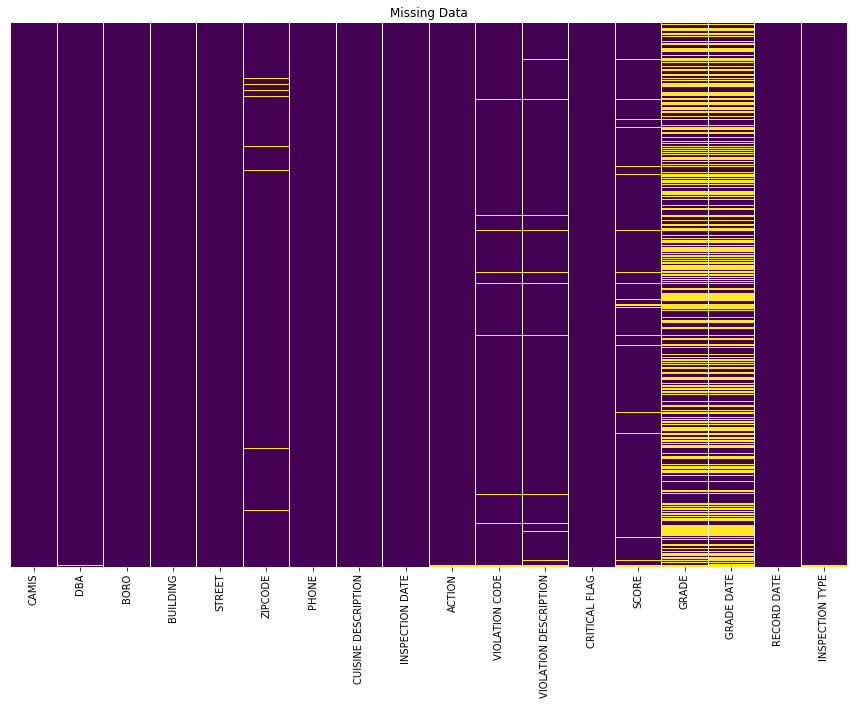

In [7]:
# visualize null values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [31]:
# drop rows where inspection date = 01/01/1900 - showed before how these are contributing to number of null values
df = df[df['INSPECTION DATE'] != '01/01/1900']

In [32]:
# relook at number of null values - decreased across the board
df.isnull().sum()

CAMIS                         0
DBA                           4
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             4456
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                    189013
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [33]:
# removing new restaurants decreased overall dataset by 1268 data points
df.shape

(382032, 18)

In [34]:
# look at the unique values of the Grade column
df['GRADE'].unique()

array(['A', nan, 'B', 'C', 'P', 'Z', 'Not Yet Graded', 'G'], dtype=object)

In [4]:
# look at the data points where Grade is null
df[df.GRADE.isnull() == True].groupby(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE']).agg({
        'CUISINE DESCRIPTION': 'first',
        'ACTION': 'unique',
        'VIOLATION CODE': 'nunique',
        'VIOLATION DESCRIPTION': 'nunique',
        'CRITICAL FLAG': 'nunique',
        'SCORE': 'mean',
        'GRADE': 'unique',
        'GRADE DATE': 'unique',
        'RECORD DATE': 'unique',
        'INSPECTION TYPE': 'unique'})

CUISINE DESCRIPTION  \
CAMIS    DBA                            BORO          BUILDING STREET              ZIPCODE PHONE      INSPECTION DATE                                                      
30112340 WENDY'S                        BROOKLYN      469      FLATBUSH AVENUE     11225.0 7182875005 04/12/2016                                              Hamburgers   
                                                                                                      04/30/2016                                              Hamburgers   
                                                                                                      06/26/2017                                              Hamburgers   
                                                                                                      10/03/2016                                              Hamburgers   
30191841 DJ REYNOLDS PUB AND RESTAURANT MANHATTAN     351      WEST   57 STREET    10019.0 2122452912 07/27/2017                                                   Irish   
                                                                                                      08/31/2015                                                   Irish   
40356018 RIVIERA CATERERS               BROOKLYN      2780     STILLWELL AVENUE    11224.0 7183723031 07/20/2017                                                American   
40356151 BRUNOS ON THE BOULEVARD        QUEENS        8825     ASTORIA BOULEVARD   11369.0 7183350505 08/19/2017                                                American   
                                                                                                      10/06/2018                                                American   
40359705 NATHAN'S FAMOUS                BROOKLYN      1310     SURF AVENUE         11224.0 7183332202 06/01/2016                                                 Hotdogs   
40360045 SEUDA FOODS                    BROOKLYN      705      KINGS HIGHWAY       11223.0 7183751500 03/13/2017                                           Jewish/Kosher   
                                                                                                      08/08/2016                                           Jewish/Kosher   
40360076 CARVEL ICE CREAM               BROOKLYN      203      CHURCH AVENUE       11218.0 7184389501 03/20/2019                         Ice Cream, Gelato, Yogurt, Ices   
40361322 CARVEL ICE CREAM               QUEENS        26515    HILLSIDE AVENUE     11004.0 7183430392 03/28/2018                         Ice Cream, Gelato, Yogurt, Ices   
40361618 SAL'S DELI                     QUEENS        12908    20 AVENUE           11356.0 7186619498 01/28/2016                                            Delicatessen   
                                                                                                      07/23/2015                                            Delicatessen   
                                                                                                      12/01/2017                                            Delicatessen   
40362264 P & S DELI GROCERY             MANHATTAN     730      COLUMBUS AVENUE     10025.0 2129323030 05/16/2018                                                American   
                                                                                                      06/05/2017                                                American   
                                                                                                      07/10/2018                                                American   
                                                                                                      11/07/2018                                                American   
40362274 ANGELIKA FILM CENTER           MANHATTAN     18       WEST HOUSTON STREET 10012.0 2129952570 01/02/2019                                                American   
                     

In [35]:
# fill in Grade null values with 'Not Yet Graded' - based on grading criteria on DOHMH, a grade is not given if poor scores, new restaurants not open to public yet, or those hoping to reopen - so those who do not have an A(did not pass inspection process)
df.GRADE = df.GRADE.fillna('Not Yet Graded')

In [6]:
df.isnull().sum()

CAMIS                         0
DBA                           4
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             4456
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                         0
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [7]:
# look at the null values in DBA (restaurant name)
df[df.DBA.isnull() == True]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
383257,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection
383258,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection
383259,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection
383260,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection


In [36]:
# fill in the null values in DBA with the location address - all the same location
df.DBA = df.DBA.fillna('1634 NOSTRAND AVE BROOKLYN')

In [9]:
# look at null values for Violation Code and Descriptions
df[(df['VIOLATION CODE'].isnull() == True) | (df['VIOLATION DESCRIPTION'].isnull() == True)]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
28,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/12/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,Not Yet Graded,NaN,05/06/2019,Cycle Inspection / Initial Inspection
86,40359480,1 EAST 66TH STREET KITCHEN,MANHATTAN,1,EAST 66 STREET,10065.0,2128793900,American,05/06/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,05/06/2016,05/06/2019,Cycle Inspection / Initial Inspection
276,40362869,SHASHEMENE INT'L RESTAURANT,BROOKLYN,195,EAST 56 STREET,11203.0,3474300871,Caribbean,04/28/2018,Violations were cited in the following area(s).,15F,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Smoke-Free Air Act / Initial Inspection
277,40362869,SHASHEMENE INT'L RESTAURANT,BROOKLYN,195,EAST 56 STREET,11203.0,3474300871,Caribbean,04/28/2018,Violations were cited in the following area(s).,15F,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Smoke-Free Air Act / Initial Inspection
296,40363098,DUNKIN' DONUTS,BROOKLYN,56,COURT STREET,11201.0,7186252068,Donuts,02/12/2018,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Administrative Miscellaneous / Initial Inspection
415,40363744,SONNY'S HEROS,BROOKLYN,1031,EAST 92 STREET,11236.0,7184859810,American,05/11/2017,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,05/11/2017,05/06/2019,Cycle Inspection / Initial Inspection
656,40364389,OLD TOWN BAR & RESTAURANT,MANHATTAN,45,EAST 18 STREET,10003.0,2125296732,American,04/04/2019,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Administrative Miscellaneous / Initial Inspection
757,40364449,GOTTSCHEER HALL,QUEENS,657,FAIRVIEW AVENUE,11385.0,7183663030,German,04/20/2018,Violations were cited in the following area(s).,15F,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Smoke-Free Air Act / Initial Inspection
915,40364681,TOWNE CAFE,BROOKLYN,2602,EAST 15 STREET,11235.0,5162419888,American,05/24/2017,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Administrative Miscellaneous / Initial Inspection
952,40364715,OLD HOMESTEAD,MANHATTAN,56,9 AVENUE,10011.0,2122429040,American,11/17/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Trans Fat / Compliance Inspection


In [37]:
# fill in the null values in Violation Code column with 'None' because the Action columns describe that no violations were found during the citation
# will be dropping Violation Description column in another step
df['VIOLATION CODE'] = df['VIOLATION CODE'].fillna('None')

In [38]:
df.isnull().sum()

CAMIS                         0
DBA                           0
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE                0
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                         0
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [39]:
# look at value counts of Record Date - all the same values
df['RECORD DATE'].value_counts()

05/06/2019    382032
Name: RECORD DATE, dtype: int64

In [13]:
# look at value counts of Inspection Type
df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          224242
Cycle Inspection / Re-inspection                                90118
Pre-permit (Operational) / Initial Inspection                   27018
Pre-permit (Operational) / Re-inspection                        11723
Administrative Miscellaneous / Initial Inspection                6999
Cycle Inspection / Reopening Inspection                          4249
Pre-permit (Non-operational) / Initial Inspection                3467
Smoke-Free Air Act / Initial Inspection                          2795
Administrative Miscellaneous / Re-inspection                     2097
Trans Fat / Initial Inspection                                   1909
Pre-permit (Operational) / Compliance Inspection                 1155
Calorie Posting / Initial Inspection                             1143
Pre-permit (Operational) / Reopening Inspection                   992
Inter-Agency Task Force / Initial Inspection                      980
Cycle Inspection / C

In [40]:
# drop unnecessary columns
df2 = df.drop(['BUILDING', 'STREET', 'PHONE', 'ACTION', 'RECORD DATE', 'GRADE DATE', 'INSPECTION TYPE'], axis=1).copy()

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382032 entries, 0 to 383260
Data columns (total 11 columns):
CAMIS                    382032 non-null int64
DBA                      382032 non-null object
BORO                     382032 non-null object
ZIPCODE                  376519 non-null float64
CUISINE DESCRIPTION      382032 non-null object
INSPECTION DATE          382032 non-null object
VIOLATION CODE           382032 non-null object
VIOLATION DESCRIPTION    374811 non-null object
CRITICAL FLAG            382032 non-null object
SCORE                    365258 non-null float64
GRADE                    382032 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 35.0+ MB


In [16]:
# relook at null value counts after dropping columns (some which had null values)
df2.isnull().sum()

CAMIS                        0
DBA                          0
BORO                         0
ZIPCODE                   5513
CUISINE DESCRIPTION          0
INSPECTION DATE              0
VIOLATION CODE               0
VIOLATION DESCRIPTION     7221
CRITICAL FLAG                0
SCORE                    16774
GRADE                        0
dtype: int64

Text(0.5, 1.0, 'Missing Data')

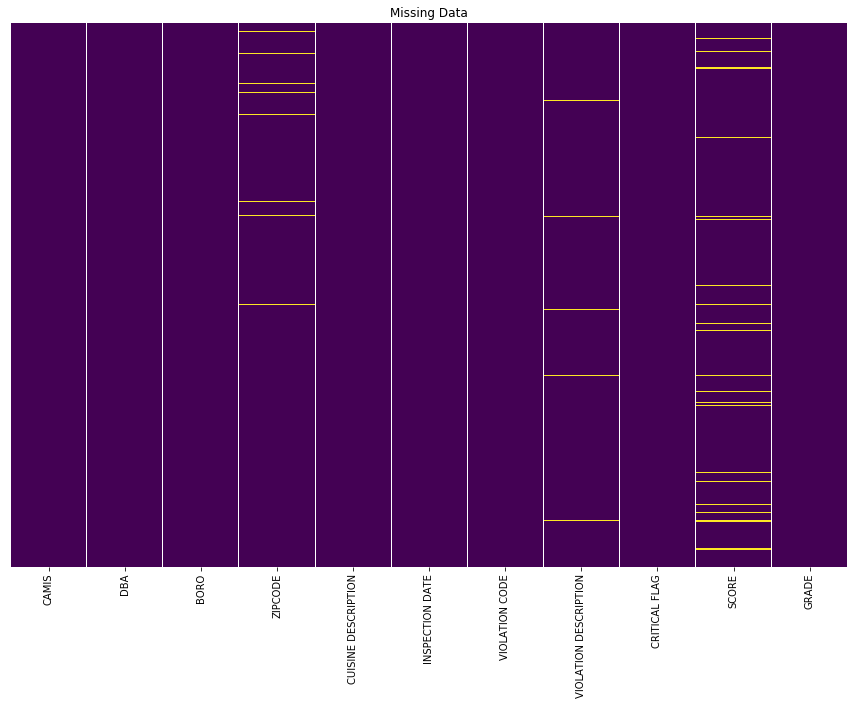

In [31]:
# visualize null values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [60]:
# looking at the null values in zip codes
df2[df2['ZIPCODE'].isnull() == True].groupby(['CAMIS', 'DBA', 'BORO', 'CUISINE DESCRIPTION']).agg({
                    'ZIPCODE': 'first',
                    'INSPECTION DATE': 'unique',
                    'VIOLATION CODE': 'count',
                    'VIOLATION DESCRIPTION': 'count',
                    'CRITICAL FLAG': 'count',
                    'SCORE': 'mean',
                    'GRADE': 'max'
})

,,,,ZIPCODE,INSPECTION DATE,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE
CAMIS,DBA,BORO,CUISINE DESCRIPTION,,,,,,,
40364149,AUNTIE ANNE'S PRETZELS,MANHATTAN,Bagels/Pretzels,NaN,"[02/04/2019, 02/09/2018, 12/28/2016, 06/14/201...",13,13,13,20.076923,0
40364691,THE GEORGIAN SUITE KITCHEN,MANHATTAN,Continental,NaN,"[01/24/2019, 01/08/2018, 02/24/2017, 01/27/2017]",9,9,9,13.444444,0
40365726,BARBETTA RESTAURANT,MANHATTAN,Italian,NaN,"[06/20/2018, 02/15/2017, 01/27/2016]",13,13,13,20.615385,0
40367240,CHARLIES SPORTS BAR,QUEENS,"Bottled beverages, including water, sodas, juices, etc.",NaN,"[04/05/2019, 11/24/2018, 10/25/2018, 07/23/201...",21,20,21,17.200000,0
40368552,SAMMY'S STEAKHOUSE,MANHATTAN,Steak,NaN,"[05/03/2019, 05/25/2018, 05/30/2017]",5,5,5,9.400000,0
40369051,STEVE'S COFFEE SHOP,QUEENS,CafÃ©/Coffee/Tea,NaN,"[04/02/2019, 11/29/2018, 11/02/2018, 10/31/201...",17,17,17,16.000000,0
40376583,WAR MEMORIAL ICE SKATING RINK,STATEN ISLAND,American,NaN,"[03/24/2018, 01/14/2017]",2,2,2,3.500000,0
40379628,HASAKI RESTAURANT,MANHATTAN,Japanese,NaN,"[04/23/2019, 04/18/2018, 02/06/2018, 12/21/201...",13,13,13,19.307692,0
40380164,CUCHIFRITOS,BRONX,Spanish,NaN,"[08/21/2018, 08/23/2017, 12/09/2016, 09/28/201...",21,21,21,19.000000,0


In [41]:
# drop rows with null values for zip codes
df3 = df2[df2.ZIPCODE.isnull() == False].copy()

In [82]:
df3.isnull().sum()

CAMIS                        0
DBA                          0
BORO                         0
ZIPCODE                      0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
VIOLATION CODE               0
VIOLATION DESCRIPTION     7065
CRITICAL FLAG                0
SCORE                    16529
GRADE                        0
dtype: int64

In [10]:
# dropping citations with no zipcodes - decreased dataset by 5713
df3.shape

(376519, 11)

In [11]:
# check value counts of target column
df3.GRADE.value_counts()

Not Yet Graded    188740
A                 150851
B                  23660
C                   7815
Z                   3153
P                   2295
G                      5
Name: GRADE, dtype: int64

### Split Inspection Date Column into Month and Year Columns

In [42]:
# convert Inspection Date column into datetime type
df3['INSPECTION DATE'] = pd.to_datetime(df3['INSPECTION DATE'])

In [43]:
# split Inspection Date column into month and year columns
df3['INSPECTION MONTH'] = df3['INSPECTION DATE'].dt.month
df3['INSPECTION YEAR'] = df3['INSPECTION DATE'].dt.year

In [44]:
# bin values in Grade into not A (=0)
df3.loc[df3['GRADE'] != 'A', 'GRADE'] = 0

In [45]:
# bin values in Grade into A (=1)
df3.loc[df3['GRADE'] == 'A', 'GRADE'] = 1

In [46]:
df3.GRADE.value_counts()

0    225668
1    150851
Name: GRADE, dtype: int64

In [47]:
df3.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,INSPECTION YEAR
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2018-05-11,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,1,5,2018
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2018-05-11,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,1,5,2018
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2017-05-18,06D,"Food contact surface not properly washed, rins...",Critical,7.0,1,5,2017
3,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2017-05-18,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,1,5,2017
4,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2016-02-18,04L,Evidence of mice or live mice present in facil...,Critical,10.0,1,2,2016


### Looking at Violation Codes and Descriptions

In [48]:
# create separate table of violations mapping violation codes with violation descriptions
violations = df3.loc[:, 'VIOLATION CODE':'CRITICAL FLAG'].copy()

In [49]:
violations.head()

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,08C,Pesticide use not in accordance with label or ...,Not Critical
1,10F,Non-food contact surface improperly constructe...,Not Critical
2,06D,"Food contact surface not properly washed, rins...",Critical
3,10F,Non-food contact surface improperly constructe...,Not Critical
4,04L,Evidence of mice or live mice present in facil...,Critical


In [50]:
# group violations - decrease duplicates
violations = violations.groupby(['VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG']).count().reset_index()

In [28]:
violations

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,02A,Food not cooked to required minimum temperature.,Critical
1,02B,Hot food item not held at or above 140Âº F.,Critical
2,02C,Hot food item that has been cooked and refrige...,Critical
3,02D,Precooked potentially hazardous food from comm...,Critical
4,02E,"Whole frozen poultry or poultry breasts, other...",Critical
5,02F,"Meat, fish or molluscan shellfish served raw o...",Critical
6,02G,Cold food item held above 41Âº F (smoked fish ...,Critical
7,02H,Food not cooled by an approved method whereby ...,Critical
8,02I,Food prepared from ingredients at ambient temp...,Critical
9,02J,Reduced oxygen packaged (ROP) foods not cooled...,Critical


In [19]:
# write violations list to csv file
violations.to_csv('./violations_list.csv')

In [51]:
# create list of critical violations
critical_violations = violations[violations['CRITICAL FLAG']=='Critical']

In [52]:
# create list of noncritical violations
noncritical_violations = violations[violations['CRITICAL FLAG']=='Not Critical']

In [31]:
critical_violations

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
0,02A,Food not cooked to required minimum temperature.,Critical
1,02B,Hot food item not held at or above 140Âº F.,Critical
2,02C,Hot food item that has been cooked and refrige...,Critical
3,02D,Precooked potentially hazardous food from comm...,Critical
4,02E,"Whole frozen poultry or poultry breasts, other...",Critical
5,02F,"Meat, fish or molluscan shellfish served raw o...",Critical
6,02G,Cold food item held above 41Âº F (smoked fish ...,Critical
7,02H,Food not cooled by an approved method whereby ...,Critical
8,02I,Food prepared from ingredients at ambient temp...,Critical
9,02J,Reduced oxygen packaged (ROP) foods not cooled...,Critical


In [32]:
noncritical_violations

,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG
49,08A,Facility not vermin proof. Harborage or condit...,Not Critical
50,08B,Covered garbage receptacle not provided or ina...,Not Critical
51,08C,Pesticide use not in accordance with label or ...,Not Critical
52,09A,Canned food product observed dented and not se...,Not Critical
53,09B,Thawing procedures improper.,Not Critical
54,09C,Food contact surface not properly maintained.,Not Critical
55,10A,Toilet facility not maintained and provided wi...,Not Critical
56,10B,Plumbing not properly installed or maintained;...,Not Critical
57,10C,Lighting inadequate; permanent lighting not pr...,Not Critical
58,10D,Mechanical or natural ventilation system not p...,Not Critical


In [22]:
# write critical violations list to csv file
critical_violations.to_csv('./data/critical_violations_list.csv')

In [23]:
# write non-critical violations list to csv file
noncritical_violations.to_csv('./data/noncritical_violations_list.csv')

### Dummies

In [53]:
# create dummy variables of critical flag column
flag_dummies = pd.get_dummies(df3['CRITICAL FLAG'], prefix='FLAG_')

In [54]:
flag_dummies.head()

,FLAG__Critical,FLAG__Not Applicable,FLAG__Not Critical
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [55]:
# only interested in number of critical and not critical flags
flag_dummies = flag_dummies.drop(['FLAG__Not Applicable'], axis=1)

In [56]:
flag_dummies.head()

,FLAG__Critical,FLAG__Not Critical
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [57]:
flag_dummies.shape

(376519, 2)

In [58]:
# concat the flag_dummies dataframe into the main dataframe
df3_flag = pd.concat([df3, flag_dummies], axis=1)

In [59]:
# check shape
df3_flag.shape

(376519, 15)

In [60]:
df3_flag.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2018-05-11,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,1,5,2018,0,1
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2018-05-11,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,1,5,2018,0,1
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2017-05-18,06D,"Food contact surface not properly washed, rins...",Critical,7.0,1,5,2017,1,0
3,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2017-05-18,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,1,5,2017,0,1
4,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2016-02-18,04L,Evidence of mice or live mice present in facil...,Critical,10.0,1,2,2016,1,0


In [61]:
# look at the unique values of Violation Codes where the descriptions are not available
df3_flag[df3_flag['VIOLATION DESCRIPTION'].isnull()==True]['VIOLATION CODE'].unique()

array(['None', '15F', '22G', '22F', '15A', '15E', '15G', '17A', '19A'],
      dtype=object)

In [62]:
# replace Violation Codes where descriptions are not available with "Other" to better differentiate them - all do not have a critical flag (=N/A)
df3_flag.loc[df3_flag['VIOLATION CODE']=='15A', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='15E', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='15F', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='15G', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='17A', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='19A', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='22F', 'VIOLATION CODE'] = 'Other'
df3_flag.loc[df3_flag['VIOLATION CODE']=='22G', 'VIOLATION CODE'] = 'Other'

In [63]:
df3_flag['VIOLATION CODE'].unique()

array(['08C', '10F', '06D', '04L', '08A', '02G', '10B', '04H', '04N',
       '06A', '06C', '10A', '06B', '10E', '15I', '15L', 'None', '10H',
       '20A', '22C', '09A', '02B', '10I', '06F', '09C', '04M', '06E',
       '04K', '04A', '20F', '04C', '16B', '04J', '09B', 'Other', '05H',
       '16E', '10D', '10J', '05F', '02H', '16A', '22A', '02I', '05A',
       '05D', '04E', '10C', '02D', '02A', '04F', '06G', '22E', '08B',
       '04O', '20D', '02C', '05B', '04B', '18F', '03A', '16C', '20E',
       '16D', '04D', '18C', '05C', '22B', '03B', '04G', '03D', '03C',
       '10G', '18G', '15J', '02F', '18D', '18B', '03G', '07A', '05E',
       '15K', '03E', '15S', '15T', '06H', '06I', '20B', '04I', '02J',
       '02E', '03F', '16F'], dtype=object)

In [64]:
# drop Inspection Date and Violation Description columns - unneeded - described by other columns
df3_flag = df3_flag.drop(['INSPECTION DATE', 'VIOLATION DESCRIPTION'], axis=1)

In [65]:
# create dummy variables of violation code column
violation_dummies = pd.get_dummies(df3_flag['VIOLATION CODE'], prefix='VIOLATION_')

In [66]:
violation_dummies.head()

,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,VIOLATION__02D,VIOLATION__02E,VIOLATION__02F,VIOLATION__02G,VIOLATION__02H,VIOLATION__02I,VIOLATION__02J,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# concatenate violation_dummies back into main dataframe
df3_violation = pd.concat([df3_flag, violation_dummies], axis=1)

In [68]:
df3_violation.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,08C,Not Critical,5.0,1,5,...,0,0,0,0,0,0,0,0,0,0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,10F,Not Critical,5.0,1,5,...,0,0,0,0,0,0,0,0,0,0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,06D,Critical,7.0,1,5,...,0,0,0,0,0,0,0,0,0,0
3,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,10F,Not Critical,7.0,1,5,...,0,0,0,0,0,0,0,0,0,0
4,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,04L,Critical,10.0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df3_violation.shape

(376519, 106)

In [70]:
# drop Violation Code and Critical Flag columns - unnecessary due to dummy variables
df4 = df3_violation.drop(['VIOLATION CODE', 'CRITICAL FLAG'], axis=1).copy()

In [71]:
df4.shape

(376519, 104)

In [72]:
# group citations based on restaurant id (CAMIS), inspection month, and inspection year
df4_grouped = df4.groupby(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'INSPECTION MONTH', 'INSPECTION YEAR']).agg({
                    'CUISINE DESCRIPTION': 'first', 'FLAG__Critical': 'sum', 'FLAG__Not Critical': 'sum', 'GRADE': 'max', 'SCORE': 'mean',
                    'VIOLATION__02A': 'sum', 'VIOLATION__02B': 'sum', 'VIOLATION__02C': 'sum', 'VIOLATION__02D': 'sum', 
                    'VIOLATION__02E': 'sum', 'VIOLATION__02F': 'sum', 'VIOLATION__02G': 'sum', 'VIOLATION__02H': 'sum', 
                    'VIOLATION__02I': 'sum', 'VIOLATION__02J': 'sum', 'VIOLATION__03A': 'sum', 'VIOLATION__03B': 'sum', 
                    'VIOLATION__03C': 'sum', 'VIOLATION__03D': 'sum', 'VIOLATION__03E': 'sum', 'VIOLATION__03F': 'sum', 
                    'VIOLATION__03G': 'sum', 'VIOLATION__04A': 'sum', 'VIOLATION__04B': 'sum', 'VIOLATION__04C': 'sum', 
                    'VIOLATION__04D': 'sum', 'VIOLATION__04E': 'sum', 'VIOLATION__04F': 'sum', 'VIOLATION__04G': 'sum', 
                    'VIOLATION__04H': 'sum', 'VIOLATION__04I': 'sum', 'VIOLATION__04J': 'sum', 'VIOLATION__04K': 'sum',
                     'VIOLATION__04L': 'sum', 'VIOLATION__04M': 'sum', 'VIOLATION__04N': 'sum', 'VIOLATION__04O': 'sum', 
                    'VIOLATION__05A': 'sum', 'VIOLATION__05B': 'sum', 'VIOLATION__05C': 'sum', 'VIOLATION__05D': 'sum', 
                    'VIOLATION__05E': 'sum', 'VIOLATION__05F': 'sum', 'VIOLATION__05H': 'sum', 'VIOLATION__06A': 'sum', 
                    'VIOLATION__06B': 'sum', 'VIOLATION__06C': 'sum', 'VIOLATION__06D': 'sum', 'VIOLATION__06E': 'sum', 
                    'VIOLATION__06F': 'sum', 'VIOLATION__06G': 'sum', 'VIOLATION__06H': 'sum', 'VIOLATION__06I': 'sum', 
                    'VIOLATION__07A': 'sum', 'VIOLATION__08A': 'sum', 'VIOLATION__08B': 'sum', 'VIOLATION__08C': 'sum', 
                    'VIOLATION__09A': 'sum', 'VIOLATION__09B': 'sum', 'VIOLATION__09C': 'sum', 'VIOLATION__10A': 'sum',
                    'VIOLATION__10B': 'sum', 'VIOLATION__10C': 'sum', 'VIOLATION__10D': 'sum', 'VIOLATION__10E': 'sum', 
                    'VIOLATION__10F': 'sum', 'VIOLATION__10G': 'sum', 'VIOLATION__10H': 'sum', 'VIOLATION__10I': 'sum', 
                    'VIOLATION__10J': 'sum',  'VIOLATION__15I': 'sum', 'VIOLATION__15J': 'sum', 'VIOLATION__15K': 'sum', 
                    'VIOLATION__15L': 'sum', 'VIOLATION__15S': 'sum', 'VIOLATION__15T': 'sum', 'VIOLATION__16A': 'sum', 
                    'VIOLATION__16B': 'sum', 'VIOLATION__16C': 'sum', 'VIOLATION__16D': 'sum', 'VIOLATION__16E': 'sum', 
                    'VIOLATION__16F': 'sum', 'VIOLATION__18B': 'sum', 'VIOLATION__18C': 'sum',
                    'VIOLATION__18D': 'sum', 'VIOLATION__18F': 'sum', 'VIOLATION__18G': 'sum',  
                    'VIOLATION__20A': 'sum', 'VIOLATION__20B': 'sum', 'VIOLATION__20D': 'sum', 'VIOLATION__20E': 'sum',
                    'VIOLATION__20F': 'sum', 'VIOLATION__22A': 'sum', 'VIOLATION__22B': 'sum', 'VIOLATION__22C': 'sum', 
                    'VIOLATION__22E': 'sum', 'VIOLATION__None': 'sum', 'VIOLATION__Other': 'sum'}).reset_index()

In [73]:
df4_grouped.shape

(120764, 104)

In [74]:
df4_grouped.head()

,CAMIS,DBA,BORO,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,CUISINE DESCRIPTION,FLAG__Critical,FLAG__Not Critical,GRADE,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,2,2016,Bakery,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,5,2017,Bakery,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,5,2018,Bakery,0,2,1,...,0,0,0,0,0,0,0,0,0,0
3,30112340,WENDY'S,BROOKLYN,11225.0,3,2018,Hamburgers,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,30112340,WENDY'S,BROOKLYN,11225.0,3,2019,Hamburgers,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# reorganize the order of the columns
df5 = df4_grouped[['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION', 'INSPECTION MONTH', 'INSPECTION YEAR', 'FLAG__Critical', 'FLAG__Not Critical',
 'VIOLATION__02A', 'VIOLATION__02B', 'VIOLATION__02C', 'VIOLATION__02D', 'VIOLATION__02E', 'VIOLATION__02F', 'VIOLATION__02G',
 'VIOLATION__02H', 'VIOLATION__02I', 'VIOLATION__02J', 'VIOLATION__03A', 'VIOLATION__03B', 'VIOLATION__03C', 'VIOLATION__03D',
 'VIOLATION__03E', 'VIOLATION__03F', 'VIOLATION__03G', 'VIOLATION__04A', 'VIOLATION__04B', 'VIOLATION__04C', 'VIOLATION__04D',
 'VIOLATION__04E', 'VIOLATION__04F', 'VIOLATION__04G', 'VIOLATION__04H', 'VIOLATION__04I', 'VIOLATION__04J', 'VIOLATION__04K',
 'VIOLATION__04L', 'VIOLATION__04M', 'VIOLATION__04N', 'VIOLATION__04O', 'VIOLATION__05A', 'VIOLATION__05B', 'VIOLATION__05C',
 'VIOLATION__05D', 'VIOLATION__05E', 'VIOLATION__05F', 'VIOLATION__05H', 'VIOLATION__06A', 'VIOLATION__06B', 'VIOLATION__06C',
 'VIOLATION__06D', 'VIOLATION__06E', 'VIOLATION__06F', 'VIOLATION__06G', 'VIOLATION__06H', 'VIOLATION__06I', 'VIOLATION__07A',
 'VIOLATION__08A', 'VIOLATION__08B', 'VIOLATION__08C', 'VIOLATION__09A', 'VIOLATION__09B', 'VIOLATION__09C', 'VIOLATION__10A',
 'VIOLATION__10B', 'VIOLATION__10C', 'VIOLATION__10D', 'VIOLATION__10E', 'VIOLATION__10F', 'VIOLATION__10G', 'VIOLATION__10H',
 'VIOLATION__10I', 'VIOLATION__10J', 'VIOLATION__15I', 'VIOLATION__15J', 'VIOLATION__15K', 'VIOLATION__15L', 'VIOLATION__15S', 'VIOLATION__15T', 'VIOLATION__16A', 'VIOLATION__16B',
 'VIOLATION__16C', 'VIOLATION__16D', 'VIOLATION__16E', 'VIOLATION__16F', 'VIOLATION__18B', 'VIOLATION__18C',
 'VIOLATION__18D', 'VIOLATION__18F', 'VIOLATION__18G', 'VIOLATION__20A',
 'VIOLATION__20B', 'VIOLATION__20D', 'VIOLATION__20E', 'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C', 
'VIOLATION__22E', 'VIOLATION__None', 'VIOLATION__Other', 'SCORE', 'GRADE']].copy()

In [76]:
df5.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,...,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__None,VIOLATION__Other,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,2,2016,1,1,0,...,0,0,0,0,0,0,0,0,10.0,1
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2017,1,1,0,...,0,0,0,0,0,0,0,0,7.0,1
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462.0,Bakery,5,2018,0,2,0,...,0,0,0,0,0,0,0,0,5.0,1
3,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2018,1,2,0,...,0,0,0,0,0,0,0,0,12.0,1
4,30112340,WENDY'S,BROOKLYN,11225.0,Hamburgers,3,2019,1,2,0,...,0,0,0,0,0,0,0,0,13.0,1


In [77]:
df5.shape

(120764, 104)

In [78]:
# check target column to make sure grouping is ok
df5.GRADE.value_counts()

1    70515
0    50249
Name: GRADE, dtype: int64

In [103]:
# convert type of zipcode values to integer from float
df5.ZIPCODE = df5.ZIPCODE.astype(int)

In [105]:
df5.ZIPCODE.dtype

dtype('int64')

In [120]:
# save copy of cleaned data to csv file
df5.to_csv('./NYC_Restaurant_Inspections_Data_Cleaned.csv')

# Sidewalk Cafes Licenses and Applications

# Import Data

In [80]:
cafes = pd.read_csv('./data/Sidewalk_Caf__Licenses_and_Applications.csv')

In [81]:
cafes.head()

,LICENSE_NBR,LIC_STATUS,BUSINESS_NAME,BUSINESS_NAME2,BUILDING,STREET,CITY,STATE,ZIP,SWC_TYPE,...,HEARING,HEARING_DD,HEARING_PUBLIC,HEARING_PUBLIC_DD,CC,CC_DD,MOO,MOO_DD,ISSUANCE,ISSUANCE_DD
0,2054411-DCA,Active,688 10TH AVE RESTAURANT CORP,HAVANA SOCIAL,688,10TH AVE,NEW YORK,NY,10019,Regular Unenclosed/Small Unenclosed,...,Recommendation Issued,06/14/2017,SWC Public Hearing,06/14/2017,Review Period Expired,07/06/2017,Approved,10/31/2017,Issued,10/31/2017
1,1414794-DCA,Active,"168 ORCHARD ST PARTNERS, INC.",NaN,168,ORCHARD ST,NEW YORK,NY,10002,Small Unenclosed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Issued,11/29/2017
2,NaN,Inactive,BRIDGE 72 LLC,HENRY'S END,72,HENRY ST,BROOKLYN,NY,11201,Unenclosed,...,Pending Review,03/18/2019,NaN,NaN,Pending Review,03/18/2019,Pending Review,03/18/2019,Pending Review,NaN
3,1349641-DCA,Active,MADISON ENTERTAINMENT ASSOCIATES LLC,NaN,625,MADISON AVE,NEW YORK,NY,10022,Small Unenclosed,...,Waived,05/31/2018,NaN,NaN,Review Period Expired,06/21/2018,Approved,08/10/2018,Issued,08/10/2018
4,0769760-DCA,Active,FIRST 69TH ST. REALTY CORP.,WESTSIDE RESTAURANT E/S/C #417,2020,BROADWAY,NEW YORK,NY,10023,Enclosed,...,Pending Review,NaN,NaN,NaN,Pending Review,NaN,Pending Review,NaN,Pending Review,NaN


In [83]:
cafes.columns

Index(['LICENSE_NBR', 'LIC_STATUS', 'BUSINESS_NAME', 'BUSINESS_NAME2',
       'BUILDING', 'STREET', 'CITY', 'STATE', 'ZIP', 'SWC_TYPE', 'SWC_SQ_FT',
       'SWC_TABLES', 'SWC_CHAIRS', 'DOHMH', 'LATITUDE', 'LONGITUDE',
       'COMMUNITY_DISTRICT', 'CITY_COUNCIL_DISTRICT', 'CD_URL', 'APP_ID',
       'APP_SWC_TYPE', 'APP_SQ_FT', 'APP_TABLES', 'APP_CHAIRS', 'APP_STATUS',
       'APP_STATUS_DATE', 'EXPIRATION_DATE', 'APP_TOO_DATE', 'SUBMIT_DATE',
       'INTAKE', 'INTAKE_DD', 'DPQA', 'SEND_PACKAGE_DD', 'CP', 'CP_DD', 'CB',
       'CB_DD', 'HEARING', 'HEARING_DD', 'HEARING_PUBLIC', 'HEARING_PUBLIC_DD',
       'CC', 'CC_DD', 'MOO', 'MOO_DD', 'ISSUANCE', 'ISSUANCE_DD'],
      dtype='object')

In [84]:
cafes.shape

(1551, 47)

# Data Cleaning

In [180]:
# drop unnecessary columns
cafes_sub = cafes.drop(['LICENSE_NBR','BUILDING', 'STREET', 'STATE', 'LATITUDE', 'LONGITUDE', 'CD_URL', 'APP_ID',  'APP_SQ_FT', 'APP_TABLES', 'APP_CHAIRS', 'APP_SWC_TYPE', 'SWC_TYPE', 'HEARING', 'HEARING_DD', 'HEARING_PUBLIC', 'HEARING_PUBLIC_DD', 'INTAKE', 'INTAKE_DD', 'DPQA', 'SEND_PACKAGE_DD', 'CP', 'CP_DD', 'CB',
       'CB_DD', 'CC', 'CC_DD', 'MOO', 'MOO_DD', 'APP_TOO_DATE', 'APP_STATUS', 'APP_STATUS_DATE',
       'EXPIRATION_DATE', 'SUBMIT_DATE', 'DOHMH'], axis=1).copy()


In [181]:
cafes_sub.columns

Index(['LIC_STATUS', 'BUSINESS_NAME', 'BUSINESS_NAME2', 'CITY', 'ZIP',
       'SWC_SQ_FT', 'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT',
       'CITY_COUNCIL_DISTRICT', 'ISSUANCE', 'ISSUANCE_DD'],
      dtype='object')

In [182]:
cafes_sub.head()

,LIC_STATUS,BUSINESS_NAME,BUSINESS_NAME2,CITY,ZIP,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,CITY_COUNCIL_DISTRICT,ISSUANCE,ISSUANCE_DD
0,Active,688 10TH AVE RESTAURANT CORP,HAVANA SOCIAL,NEW YORK,10019,89.0,5,10,104,3,Issued,10/31/2017
1,Active,"168 ORCHARD ST PARTNERS, INC.",NaN,NEW YORK,10002,366.0,12,24,103,1,Issued,11/29/2017
2,Inactive,BRIDGE 72 LLC,HENRY'S END,BROOKLYN,11201,NaN,10,20,302,33,Pending Review,NaN
3,Active,MADISON ENTERTAINMENT ASSOCIATES LLC,NaN,NEW YORK,10022,198.0,8,14,105,4,Issued,08/10/2018
4,Active,FIRST 69TH ST. REALTY CORP.,WESTSIDE RESTAURANT E/S/C #417,NEW YORK,10023,422.0,17,34,107,6,Pending Review,NaN


In [183]:
cafes_sub.isnull().sum()

LIC_STATUS                 0
BUSINESS_NAME             80
BUSINESS_NAME2           500
CITY                       0
ZIP                        0
SWC_SQ_FT                 78
SWC_TABLES                 0
SWC_CHAIRS                 0
COMMUNITY_DISTRICT         0
CITY_COUNCIL_DISTRICT      0
ISSUANCE                  33
ISSUANCE_DD              461
dtype: int64

Text(0.5, 1.0, 'Missing Data')

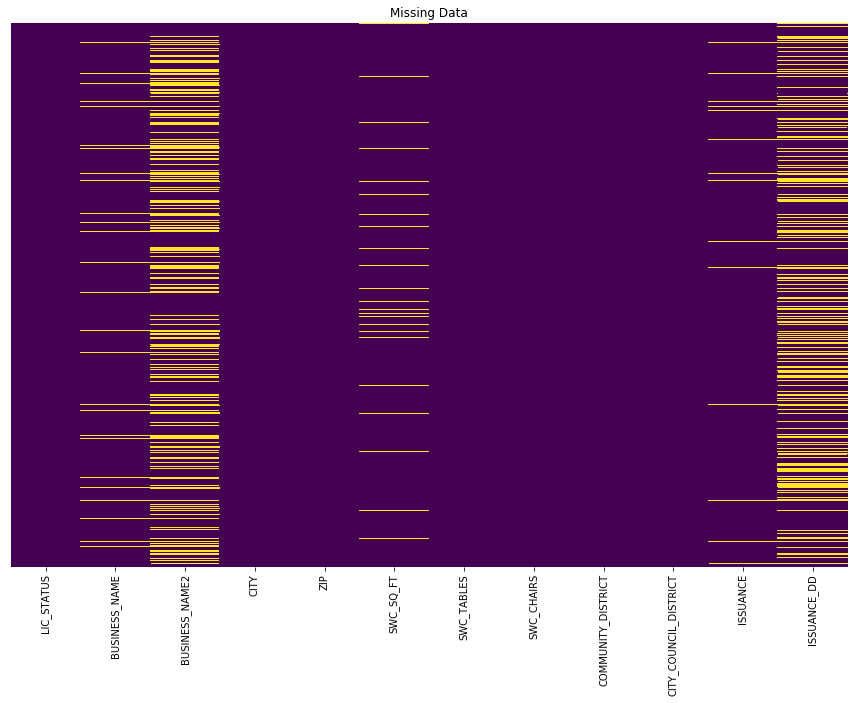

In [184]:
# visualize null values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(cafes_sub.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [186]:
# drop rows where Issuance Date is null
cafes_sub = cafes_sub.dropna(subset=['ISSUANCE_DD'])

In [187]:
cafes_sub.isnull().sum()

LIC_STATUS                 0
BUSINESS_NAME             53
BUSINESS_NAME2           333
CITY                       0
ZIP                        0
SWC_SQ_FT                  0
SWC_TABLES                 0
SWC_CHAIRS                 0
COMMUNITY_DISTRICT         0
CITY_COUNCIL_DISTRICT      0
ISSUANCE                   0
ISSUANCE_DD                0
dtype: int64

### Merge Sidewalk Cafes Licenses and Applications DataFrame to Restaurant Inspections DataFrame

In [188]:
cafes_sub.shape

(1090, 12)

In [189]:
df5.shape

(120764, 104)

In [190]:
# merge Sidewalk Cafes Licenses and Applications df to main dataframe to create a new dataframe
merged = df5.merge(cafes_sub, left_on = ['DBA','ZIPCODE'], right_on=['BUSINESS_NAME2','ZIP'], how='left')

In [191]:
merged.shape

(120789, 116)

In [192]:
merged.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,VIOLATION__02A,...,BUSINESS_NAME2,CITY,ZIP,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,CITY_COUNCIL_DISTRICT,ISSUANCE,ISSUANCE_DD
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2,2016,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,5,2017,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,5,2018,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30112340,WENDY'S,BROOKLYN,11225,Hamburgers,3,2018,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30112340,WENDY'S,BROOKLYN,11225,Hamburgers,3,2019,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
# look at number of unique restaurants
len(merged.DBA.unique())

20345

In [195]:
# drop Violation dummy variable columns
cafe_merge = merged.drop(merged.loc[:,'VIOLATION__02A':'VIOLATION__Other'], axis=1)

In [196]:
cafe_merge.shape

(120789, 23)

In [197]:
cafe_merge.columns

Index(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION MONTH', 'INSPECTION YEAR', 'FLAG__Critical',
       'FLAG__Not Critical', 'SCORE', 'GRADE', 'LIC_STATUS', 'BUSINESS_NAME',
       'BUSINESS_NAME2', 'CITY', 'ZIP', 'SWC_SQ_FT', 'SWC_TABLES',
       'SWC_CHAIRS', 'COMMUNITY_DISTRICT', 'CITY_COUNCIL_DISTRICT', 'ISSUANCE',
       'ISSUANCE_DD'],
      dtype='object')

In [198]:
cafe_merge.head()

,CAMIS,DBA,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,SCORE,...,BUSINESS_NAME2,CITY,ZIP,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,CITY_COUNCIL_DISTRICT,ISSUANCE,ISSUANCE_DD
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2,2016,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,5,2017,1,1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,5,2018,0,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30112340,WENDY'S,BROOKLYN,11225,Hamburgers,3,2018,1,2,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30112340,WENDY'S,BROOKLYN,11225,Hamburgers,3,2019,1,2,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Dummies

In [250]:
cafe_merge.isnull().sum()

CAMIS                         0
DBA                           0
BORO                          0
ZIPCODE                       0
CUISINE DESCRIPTION           0
INSPECTION MONTH              0
INSPECTION YEAR               0
FLAG__Critical                0
FLAG__Not Critical            0
SCORE                      2225
GRADE                         0
LIC_STATUS               118514
BUSINESS_NAME            118514
BUSINESS_NAME2           118514
CITY                     118514
ZIP                      118514
SWC_SQ_FT                118514
SWC_TABLES               118514
SWC_CHAIRS               118514
COMMUNITY_DISTRICT       118514
CITY_COUNCIL_DISTRICT    118514
ISSUANCE                 118514
ISSUANCE_DD              118514
dtype: int64

In [199]:
# create year dummy variables
year_dummies = pd.get_dummies(cafe_merge['INSPECTION YEAR'], prefix='YEAR')

In [200]:
# concat dummy dataframe to main dataframe
cafe_year = pd.concat([cafe_merge, year_dummies], axis=1)

In [201]:
# create month dummy variables
month_dummies = pd.get_dummies(cafe_year['INSPECTION MONTH'], prefix='MONTH')

In [202]:
# concat dummy dataframe to main dataframe
cafe_month = pd.concat([cafe_year, month_dummies], axis=1)

In [203]:
# grouping cuisines in different groups to convert to numeric
african = ['Egyptian', 'Moroccan', 'Ethiopian', 'African']
american = ['Hotdogs/Pretzels', 'Seafood', 'Tex-Mex', 'Hamburgers', 'American', 'Hotdogs', 'Steak', 'Californian', 'Chicken', 'Barbecue', 'Hawaiian', 'Cajun', 'Creole', 'Soul Food', 'Creole/Cajun', 'Creole/Cajun', 'Southwestern']
asia_pacific = ['Indonesian', 'Filipino']
asian = ['Asian', 'Chinese', 'Japanese', 'Thai', 'Indian', 'Korean', 'Vietnamese/Cambodian/Malaysia','Chinese/Japanese', 'Bangladeshi', 'Pakistani']
australian = 'Australian'
european = ['Basque', 'Scandinavian', 'Tapas', 'Irish', 'Continental', 'Pizza', 'Pizza/Italian', 'Italian', 'Polish', 'German', 'French', 'Spanish', 'Greek', 'Mediterranean', 'Eastern European', 'English', 'Portuguese', 'Tapas']
kosher = 'Jewish/Kosher'
latin = ['Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Caribbean', 'Brazilian', 'Mexican', 'Chinese/Cuban', 'Peruvian', 'Chilean']
middle_eastern = ['Middle Eastern', 'Afghan', 'Armenian', 'Turkish', 'Iranian']
russian = ['Russian', 'Czech']
bakeries = ['Bagels/Pretzels', 'Donuts', 'CafÃ©/Coffee/Tea', 'Bakery']
delis = ['Delicatessen', 'Sandwiches/Salads/Mixed Buffet', 'Pancakes/Waffles', 'Soups & Sandwiches', 'Sandwiches', 'Soups']
beverages = ['Juice, Smoothies, Fruit Salads', 'Bottled beverages, including water, sodas, juices, etc.']
healthy = ['Vegetarian', 'Salads', 'Fruits/Vegetables', 'Nuts/Confectionary']
cold_desserts = 'Ice Cream, Gelato, Yogurt, Ices'
other = 'Other'
unknown = 'Not Listed/Not Applicable'

In [204]:
# define a function to convert string value in CUISINE DESCRIPTION to numeric for categorical variable
def categorize_cuisine(x):
    if x in african:
        return 'African'
    elif x in american:
        return 'American'
    elif x in asia_pacific:
        return 'Asia Pacific'
    elif x in asian:
        return 'Asian'
    elif x == australian:
        return 'Australian'
    elif x in european:
        return 'European'
    elif x in kosher:
        return 'Kosher'
    elif x in latin:
        return 'Latin'
    elif x in middle_eastern:
        return 'Middle_Eastern'
    elif x in russian:
        return 'Russian'
    elif x in bakeries:
        return 'Bakeries'
    elif x in delis:
        return 'Delis'
    elif x in beverages:
        return 'Beverages'
    elif x in healthy:
        return 'Healthy'
    elif x in cold_desserts:
        return 'Cold Desserts'
    elif x in other:
        return 'Other'
    else:
        return 'Unknown'

In [205]:
# create new column and convert cuisine to a number
cafe_month['CUISINES'] = cafe_month['CUISINE DESCRIPTION'].apply(categorize_cuisine)

In [206]:
# drop Cuisine Description column since we have the new Cuisines column
cafe_month = cafe_month.drop(['CUISINE DESCRIPTION'], axis=1)

In [207]:
cafe_month.columns

Index(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'INSPECTION MONTH',
       'INSPECTION YEAR', 'FLAG__Critical', 'FLAG__Not Critical', 'SCORE',
       'GRADE', 'LIC_STATUS', 'BUSINESS_NAME', 'BUSINESS_NAME2', 'CITY', 'ZIP',
       'SWC_SQ_FT', 'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT',
       'CITY_COUNCIL_DISTRICT', 'ISSUANCE', 'ISSUANCE_DD', 'YEAR_2011',
       'YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016',
       'YEAR_2017', 'YEAR_2018', 'YEAR_2019', 'MONTH_1', 'MONTH_2', 'MONTH_3',
       'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9',
       'MONTH_10', 'MONTH_11', 'MONTH_12', 'CUISINES'],
      dtype='object')

In [209]:
# drop a few more unnecessary/duplicate columns before creating zipcode and cuisine dummies
cafe_month = cafe_month.drop(['BUSINESS_NAME', 'BUSINESS_NAME2', 'CITY', 'ZIP', 'ISSUANCE'], axis=1)

In [210]:
cafe_month.columns

Index(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'INSPECTION MONTH',
       'INSPECTION YEAR', 'FLAG__Critical', 'FLAG__Not Critical', 'SCORE',
       'GRADE', 'LIC_STATUS', 'SWC_SQ_FT', 'SWC_TABLES', 'SWC_CHAIRS',
       'COMMUNITY_DISTRICT', 'CITY_COUNCIL_DISTRICT', 'ISSUANCE_DD',
       'YEAR_2011', 'YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015',
       'YEAR_2016', 'YEAR_2017', 'YEAR_2018', 'YEAR_2019', 'MONTH_1',
       'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7',
       'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12', 'CUISINES'],
      dtype='object')

In [211]:
cafe_month.head()

,CAMIS,DBA,BORO,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,...,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,CUISINES
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,2,2016,1,1,10.0,1,...,0,0,0,0,0,0,0,0,0,Bakeries
1,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,5,2017,1,1,7.0,1,...,0,1,0,0,0,0,0,0,0,Bakeries
2,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,5,2018,0,2,5.0,1,...,0,1,0,0,0,0,0,0,0,Bakeries
3,30112340,WENDY'S,BROOKLYN,11225,3,2018,1,2,12.0,1,...,0,0,0,0,0,0,0,0,0,American
4,30112340,WENDY'S,BROOKLYN,11225,3,2019,1,2,13.0,1,...,0,0,0,0,0,0,0,0,0,American


In [247]:
cafe_grouped = cafe_month.drop(['INSPECTION MONTH', 'INSPECTION YEAR'], axis=1).groupby(['CAMIS', 'DBA', 'BORO', 'ZIPCODE']).agg({
    'FLAG__Critical': 'sum', 'FLAG__Not Critical': 'sum', 'SCORE': 'mean', 'GRADE': 'max',
    'LIC_STATUS':'first', 'SWC_SQ_FT':'first', 'SWC_TABLES':'first', 'SWC_CHAIRS':'first',
       'COMMUNITY_DISTRICT':'first', 'CITY_COUNCIL_DISTRICT':'first', 'ISSUANCE_DD':'first',
       'YEAR_2011':'max', 'YEAR_2012':'max', 'YEAR_2013':'max', 'YEAR_2014':'max', 'YEAR_2015':'max',
       'YEAR_2016':'max', 'YEAR_2017':'max', 'YEAR_2018':'max', 'YEAR_2019':'max', 'MONTH_1':'max',
       'MONTH_2':'max', 'MONTH_3':'max', 'MONTH_4':'max', 'MONTH_5':'max', 'MONTH_6':'max', 'MONTH_7':'max',
       'MONTH_8':'max', 'MONTH_9':'max', 'MONTH_10':'max', 'MONTH_11':'max', 'MONTH_12':'max', 'CUISINES':'first'
}).reset_index().copy()

In [248]:
cafe_grouped.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,CUISINES
0,30075445,MORRIS PARK BAKE SHOP,BRONX,10462,2,4,7.333333,1,NaN,NaN,...,0,1,0,0,0,0,0,0,0,Bakeries
1,30112340,WENDY'S,BROOKLYN,11225,9,13,14.971429,1,NaN,NaN,...,1,0,1,0,0,0,1,0,0,American
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,10019,7,7,10.833333,1,NaN,NaN,...,0,1,0,1,1,1,0,0,1,European
3,40356018,RIVIERA CATERERS,BROOKLYN,11224,3,5,10.333333,1,NaN,NaN,...,0,1,0,1,0,0,1,0,0,American
4,40356151,BRUNOS ON THE BOULEVARD,QUEENS,11369,4,4,20.000000,1,NaN,NaN,...,0,1,0,0,1,0,1,0,0,American


In [249]:
cafe_grouped.isnull().sum()

CAMIS                        0
DBA                          0
BORO                         0
ZIPCODE                      0
FLAG__Critical               0
FLAG__Not Critical           0
SCORE                        0
GRADE                        0
LIC_STATUS               24887
SWC_SQ_FT                24887
SWC_TABLES               24887
SWC_CHAIRS               24887
COMMUNITY_DISTRICT       24887
CITY_COUNCIL_DISTRICT    24887
ISSUANCE_DD              24887
YEAR_2011                    0
YEAR_2012                    0
YEAR_2013                    0
YEAR_2014                    0
YEAR_2015                    0
YEAR_2016                    0
YEAR_2017                    0
YEAR_2018                    0
YEAR_2019                    0
MONTH_1                      0
MONTH_2                      0
MONTH_3                      0
MONTH_4                      0
MONTH_5                      0
MONTH_6                      0
MONTH_7                      0
MONTH_8                      0
MONTH_9 

In [251]:
cafe_grouped.columns

Index(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'FLAG__Critical',
       'FLAG__Not Critical', 'SCORE', 'GRADE', 'LIC_STATUS', 'SWC_SQ_FT',
       'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT',
       'CITY_COUNCIL_DISTRICT', 'ISSUANCE_DD', 'YEAR_2011', 'YEAR_2012',
       'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017',
       'YEAR_2018', 'YEAR_2019', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4',
       'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10',
       'MONTH_11', 'MONTH_12', 'CUISINES'],
      dtype='object')

In [252]:
#drop rows that have null values in all of the columns listed in subset
cafe_grouped = cafe_grouped.dropna(subset=['LIC_STATUS','SWC_SQ_FT',
       'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT',
       'CITY_COUNCIL_DISTRICT', 'ISSUANCE_DD'], how='all')

In [253]:
cafe_grouped.isnull().sum()

CAMIS                    0
DBA                      0
BORO                     0
ZIPCODE                  0
FLAG__Critical           0
FLAG__Not Critical       0
SCORE                    0
GRADE                    0
LIC_STATUS               0
SWC_SQ_FT                0
SWC_TABLES               0
SWC_CHAIRS               0
COMMUNITY_DISTRICT       0
CITY_COUNCIL_DISTRICT    0
ISSUANCE_DD              0
YEAR_2011                0
YEAR_2012                0
YEAR_2013                0
YEAR_2014                0
YEAR_2015                0
YEAR_2016                0
YEAR_2017                0
YEAR_2018                0
YEAR_2019                0
MONTH_1                  0
MONTH_2                  0
MONTH_3                  0
MONTH_4                  0
MONTH_5                  0
MONTH_6                  0
MONTH_7                  0
MONTH_8                  0
MONTH_9                  0
MONTH_10                 0
MONTH_11                 0
MONTH_12                 0
CUISINES                 0
d

In [254]:
cafe_grouped.shape

(435, 37)

In [255]:
# create cuisine dummy variables
cuisine_dummies = pd.get_dummies(cafe_grouped['CUISINES'])

In [256]:
# concat dummy dataframe to main dataframe
cafe_cuisine = pd.concat([cafe_grouped, cuisine_dummies], axis=1)

In [257]:
# create zipcode dummy variables
zip_dummies = pd.get_dummies(cafe_cuisine['ZIPCODE'], prefix='ZIP')

In [258]:
# concat dummy dataframe to main dataframe
cafe_zip = pd.concat([cafe_cuisine, zip_dummies], axis=1)

In [259]:
# create boro dummy variables
boro_dummies = pd.get_dummies(cafe_zip['BORO'])

In [260]:
# concat dummy dataframe to main dataframe
cafe_boro = pd.concat([cafe_zip, boro_dummies], axis=1)

In [261]:
cafe_boro.columns

Index(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'FLAG__Critical',
       'FLAG__Not Critical', 'SCORE', 'GRADE', 'LIC_STATUS', 'SWC_SQ_FT',
       ...
       'ZIP_11249', 'ZIP_11366', 'ZIP_11368', 'ZIP_11375', 'ZIP_11421',
       'ZIP_11432', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS'],
      dtype='object', length=123)

In [262]:
cafe_boro.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
60,40364958,WHITE HORSE TAVERN,MANHATTAN,10014,22,11,19.437500,1,Active,728.0,...,0,0,0,0,0,0,0,0,1,0
110,40366473,TIO PEPE,MANHATTAN,10014,2,5,9.333333,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
240,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,10012,1,4,5.666667,1,Active,46.0,...,0,0,0,0,0,0,0,0,1,0
255,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,10014,8,5,13.600000,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
281,40373912,THE MALT HOUSE,MANHATTAN,10012,8,10,18.000000,1,Active,193.0,...,0,0,0,0,0,0,0,0,1,0


In [264]:
cafe_boro.BORO.value_counts()

MANHATTAN    333
BROOKLYN      59
QUEENS        36
BRONX          7
Name: BORO, dtype: int64

In [265]:
cafe_boro.shape

(435, 123)

In [267]:
# write final merged clean subset dataframe where we have sidewalk cafe license and business data to csv file
cafe_boro.to_csv('./data/sidewalk_cafe_inspections.csv')